In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as ply

import warnings
warnings.filterwarnings('ignore')

pd.set_option('Display.max_columns',None)

data_set = pd.read_csv('DataCoSupplyChainDataset.csv',encoding='latin1')
data_set.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [2]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [3]:
df=data_set.drop(["Customer Email","Customer Password","Product Image","Customer Fname","Customer Lname"],axis=1)

In [4]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,19491,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,19490,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,19489,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [5]:
df.rename(columns={"Type":"Type Of Payments"},inplace=True)

In [6]:
df.head()

,Type Of Payments,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,19491,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,19490,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,19489,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


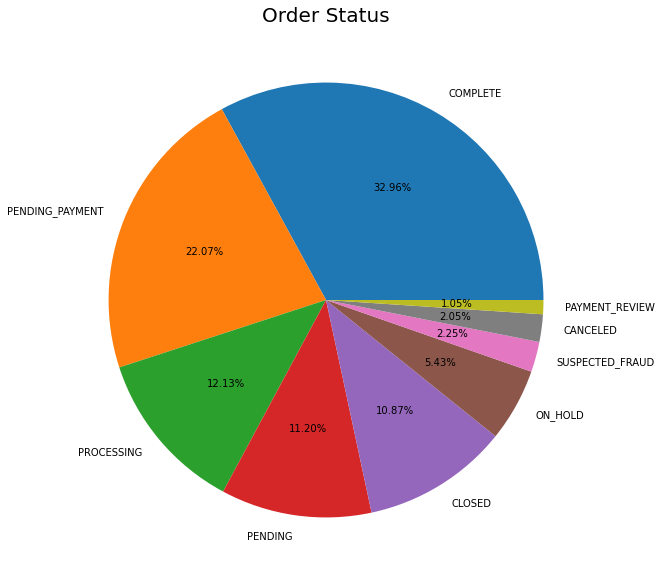

In [7]:
plt.figure(figsize=(12,10))
df['Order Status'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Order Status",fontsize=20)
plt.ylabel("")
plt.show()

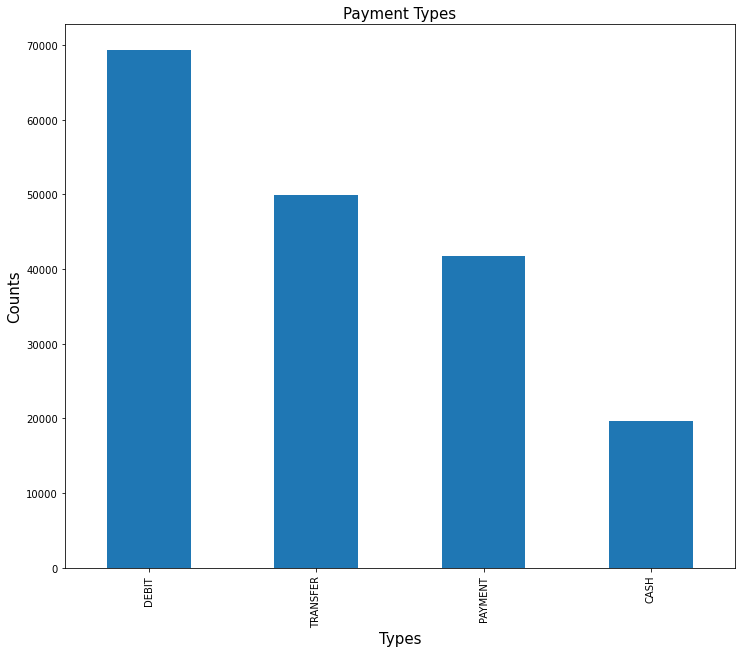

In [8]:
plt.figure(figsize=(12,10))
df['Type Of Payments'].value_counts().plot(kind='bar')
plt.title("Payment Types",fontsize=15)
plt.xlabel("Types",fontsize=15)
plt.ylabel("Counts",fontsize=15)
plt.show()

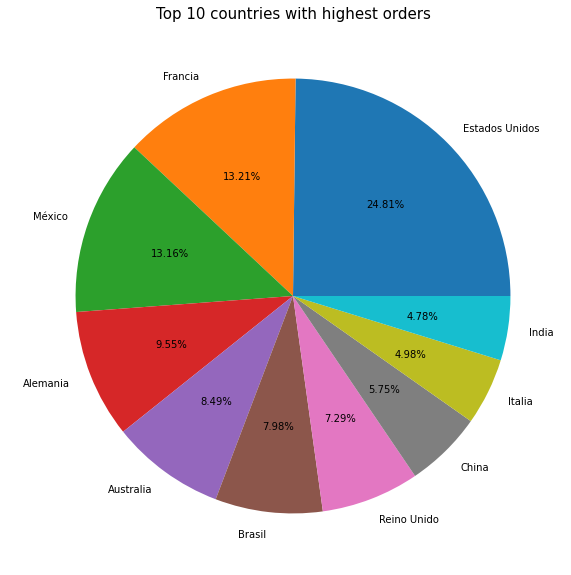

In [9]:
plt.figure(figsize=(12,10))
df['Order Country'].value_counts().iloc[:10].plot(kind='pie',autopct='%.2f%%')
plt.title("Top 10 countries with highest orders",fontsize=15)
plt.ylabel(" ")
plt.show()

In [10]:
df.head()

,Type Of Payments,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,19491,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,19490,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,19489,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


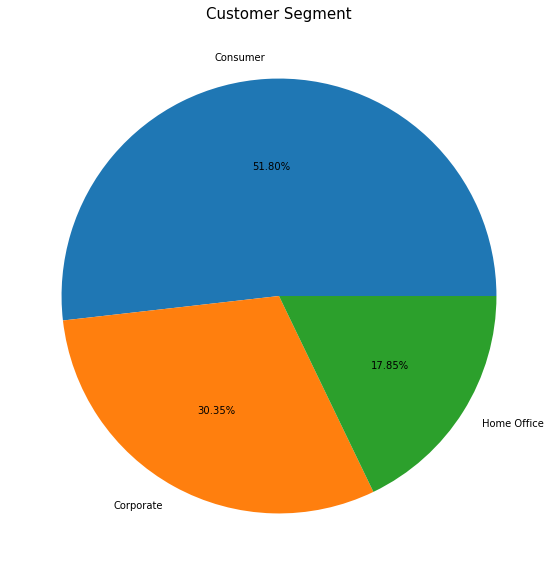

In [11]:
plt.figure(figsize=(12,10))
df['Customer Segment'].value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.title("Customer Segment",fontsize=15)
plt.ylabel("")
plt.show()

In [12]:
consumer = df[df['Customer Segment']=='Consumer']

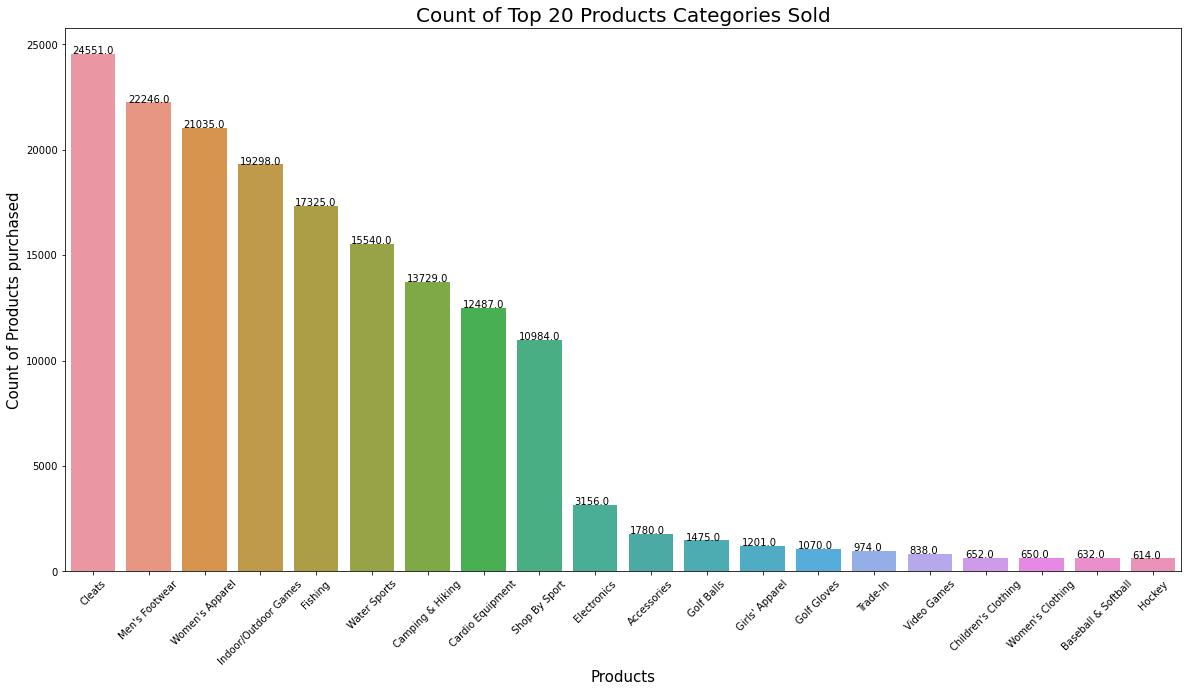

In [13]:
x = df['Category Name'].value_counts()

plt.figure(figsize=(20,10))
ax = sns.barplot(x.index[:20], x.values[:20])
for p in ax.patches:
      ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.025, p.get_height()+0.01))

plt.title("Count of Top 20 Products Categories Sold",fontsize=20)
plt.xlabel("Products",fontsize=15)
plt.ylabel("Count of Products purchased",fontsize=15)
plt.xticks(rotation=45)
plt.show()

In [14]:
df.head()

,Type Of Payments,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,19491,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,19490,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,19489,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


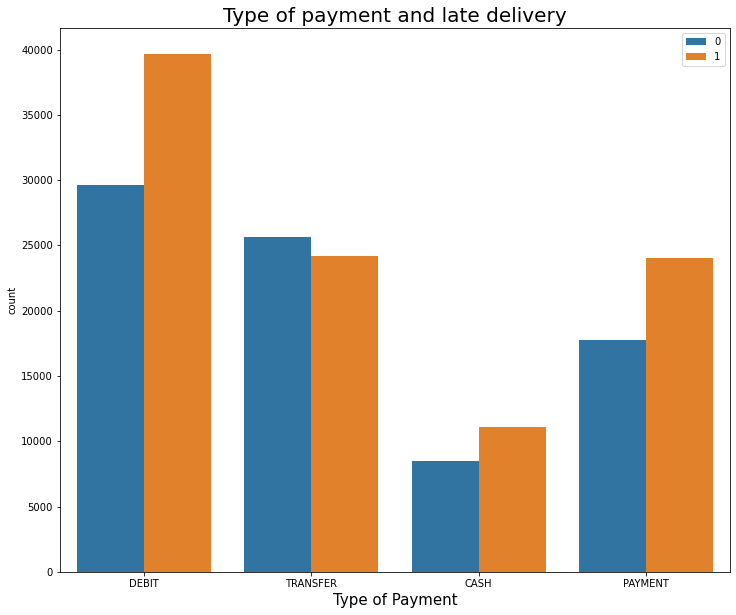

In [15]:
plt.figure(figsize=(12,10))
sns.countplot(df['Type Of Payments'],hue=df['Late_delivery_risk'])

plt.title("Type of payment and late delivery",fontsize=20)
plt.xlabel("Type of Payment",fontsize=15)
plt.legend()
plt.show()

In [16]:
df.head(2)

,Type Of Payments,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,Smart watch,327.75,0,1/18/2018 12:27,Standard Class


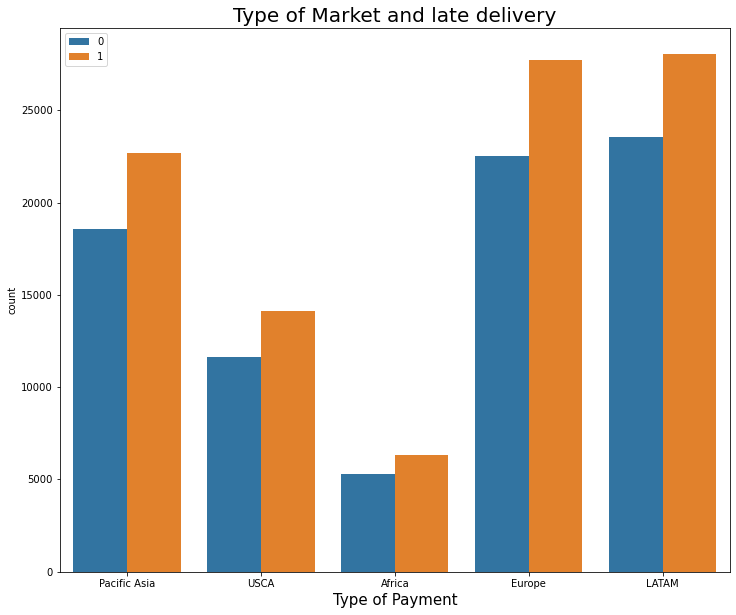

In [17]:
plt.figure(figsize=(12,10))
sns.countplot(df['Market'],hue=df['Late_delivery_risk'])

plt.title("Type of Market and late delivery",fontsize=20)
plt.xlabel("Type of Payment",fontsize=15)
plt.legend()
plt.show()

In [18]:
df.head(2)

,Type Of Payments,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,Smart watch,327.75,0,1/18/2018 12:27,Standard Class


In [19]:
x = df['Product Name'].value_counts().iloc[:15]

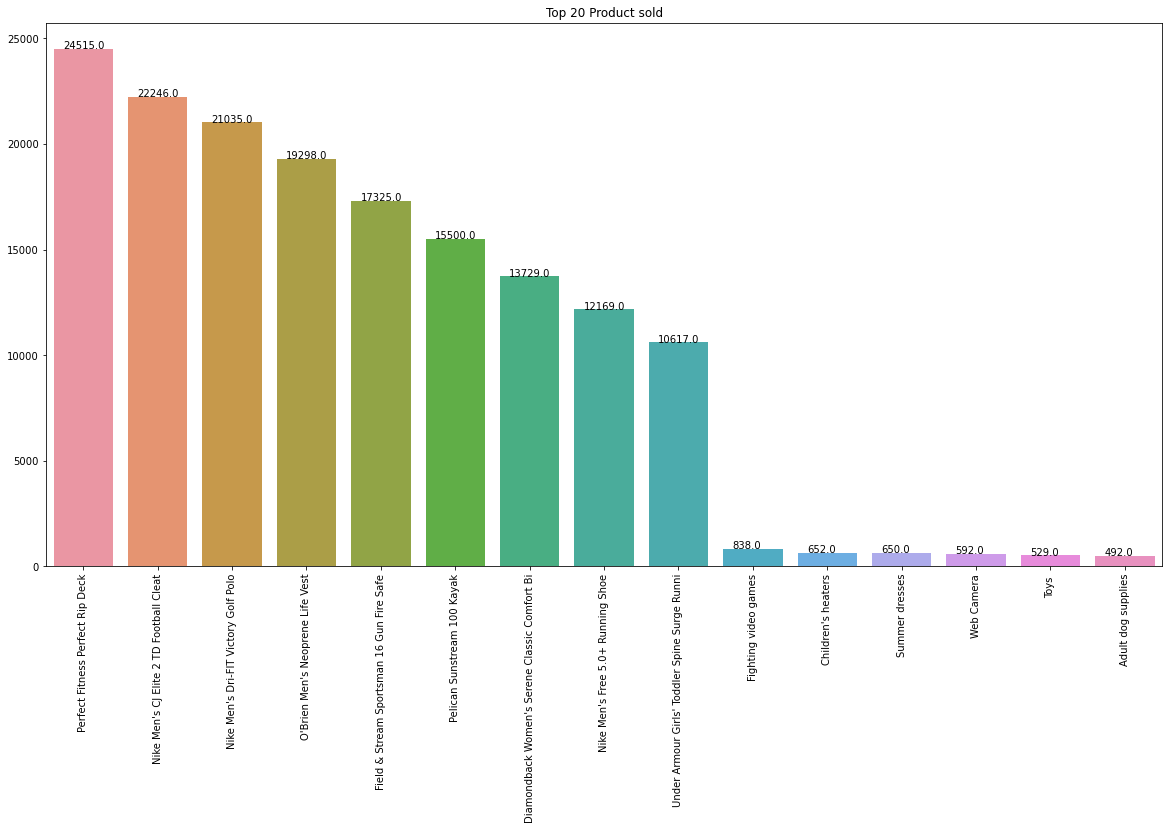

In [20]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x.index[:20], x.values[:20])
for p in ax.patches:
      ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.125, p.get_height()+0.01))

plt.title("Top 20 Product sold")
plt.xticks(rotation=90)
plt.show()

In [21]:
a = df[(df['Product Name']=='Perfect Fitness Perfect Rip Deck')]

In [22]:
a.head(2)

,Type Of Payments,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
48,PAYMENT,5,2,-30.75,115.180000,Late delivery,1,17,Cleats,Bayamon,Puerto Rico,9083,Home Office,PR,75 Sunny Grounds,957.0,4,Apparel,18.380119,-66.183128,Pacific Asia,Mirzapur,India,9083,2/24/2016 13:57,28744,365,4.8,0.04,71956,59.990002,-0.27,2,119.980003,115.180000,-30.75,South Asia,Uttar Pradesh,PENDING_PAYMENT,NaN,365,17,NaN,Perfect Fitness Perfect Rip Deck,59.990002,0,2/29/2016 13:57,Second Class
57,PAYMENT,6,2,30.57,117.580002,Late delivery,1,17,Cleats,Caguas,Puerto Rico,7864,Home Office,PR,4294 High Passage,725.0,4,Apparel,18.282795,-66.370560,USCA,San Francisco,Estados Unidos,7864,4/13/2016 10:12,32090,365,2.4,0.02,80250,59.990002,0.26,2,119.980003,117.580002,30.57,West of USA,California,PENDING_PAYMENT,94110.0,365,17,NaN,Perfect Fitness Perfect Rip Deck,59.990002,0,4/19/2016 10:12,Second Class


<AxesSubplot:xlabel='Market', ylabel='count'>

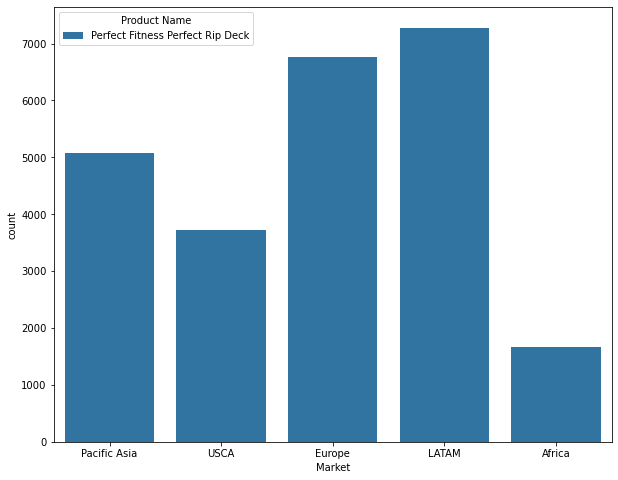

In [23]:
plt.figure(figsize=(10,8))
sns.countplot(a['Market'],hue=a['Product Name'])

In [24]:
fraud = df[df['Order Status']=='SUSPECTED_FRAUD']

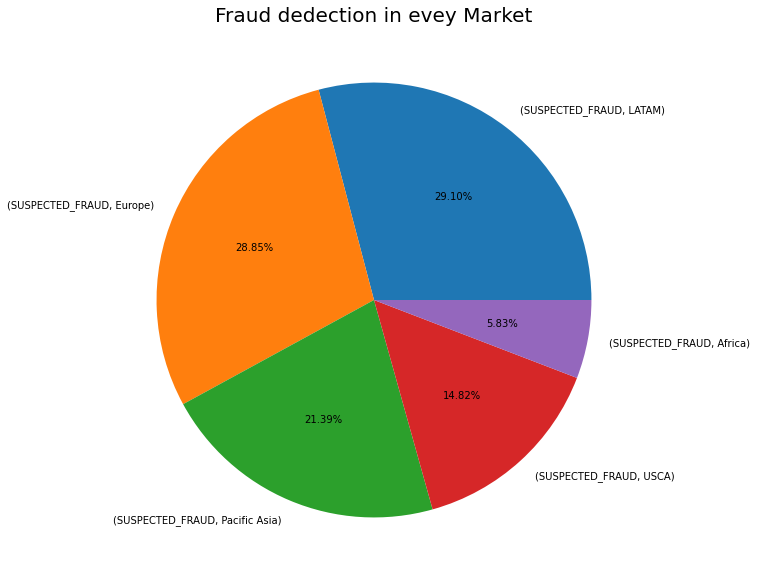

In [25]:
plt.figure(figsize=(12,10))
fraud.groupby(by='Order Status')['Market'].value_counts().plot(kind='pie',autopct='%1.2f%%')

plt.title("Fraud dedection in evey Market",fontsize=20)
plt.ylabel(" ")
plt.show()

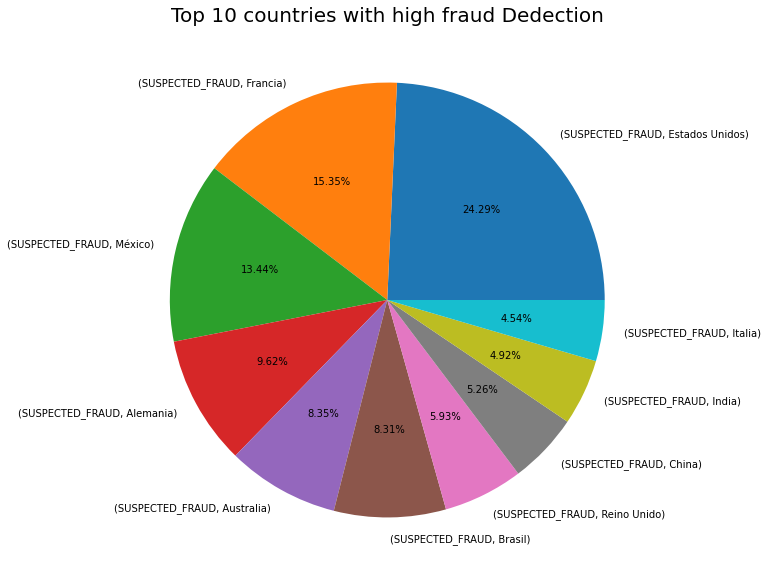

In [26]:
plt.figure(figsize=(12,10))
fraud.groupby(by='Order Status')['Order Country'].value_counts().iloc[:10].plot(kind='pie',autopct='%1.2f%%')

plt.title("Top 10 countries with high fraud Dedection",fontsize=20)
plt.ylabel(" ")
plt.show()

In [27]:
fraud['Customer Id'].value_counts().iloc[:5]

11584    12
9002     10
9010     10
9819     10
5674      9
Name: Customer Id, dtype: int64

* Customer ID 11584 has been flagged as suspected fraud for 12 times.
* Customer ID 9002,9010 and 9819 has been flagged as suspected fraud for 10 times followed by Customer ID 5674.

In [28]:
pending_cities=df[(df["Order Country"]=="India") & (df["Order Status"]=="SUSPECTED_FRAUD")]
pending_cities.head()

,Type Of Payments,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
407,TRANSFER,3,2,85.349998,304.809998,Shipping canceled,0,73,Sporting Goods,Los Angeles,EE. UU.,19400,Corporate,CA,9767 Amber Valley,90046.0,2,Fitness,34.099609,-118.350739,Pacific Asia,Bangalore,India,19400,1/12/2018 4:13,75847,1360,22.940001,0.07,179162,327.750000,0.28,1,327.750000,304.809998,85.349998,South Asia,Karnataka,SUSPECTED_FRAUD,NaN,1360,73,NaN,Smart watch,327.750000,0,1/15/2018 4:13,Second Class
1893,TRANSFER,6,4,94.839996,278.950012,Shipping canceled,0,17,Cleats,Caguas,Puerto Rico,7270,Consumer,PR,100 Clear Forest Highway,725.0,4,Apparel,18.214865,-66.370583,Pacific Asia,Nellore,India,7270,12/26/2015 19:38,24650,365,21.000000,0.07,61721,59.990002,0.34,5,299.950012,278.950012,94.839996,South Asia,Andhra Pradesh,SUSPECTED_FRAUD,NaN,365,17,NaN,Perfect Fitness Perfect Rip Deck,59.990002,0,1/1/2016 19:38,Standard Class
1894,TRANSFER,6,4,0.000000,272.950012,Shipping canceled,0,17,Cleats,Caguas,Puerto Rico,7270,Consumer,PR,100 Clear Forest Highway,725.0,4,Apparel,18.214865,-66.370583,Pacific Asia,Nellore,India,7270,12/26/2015 19:38,24650,365,27.000000,0.09,61720,59.990002,0.00,5,299.950012,272.950012,0.000000,South Asia,Andhra Pradesh,SUSPECTED_FRAUD,NaN,365,17,NaN,Perfect Fitness Perfect Rip Deck,59.990002,0,1/1/2016 19:38,Standard Class
1895,TRANSFER,6,4,-27.000000,269.959992,Shipping canceled,0,17,Cleats,Caguas,Puerto Rico,7270,Consumer,PR,100 Clear Forest Highway,725.0,4,Apparel,18.214865,-66.370583,Pacific Asia,Nellore,India,7270,12/26/2015 19:38,24650,365,30.000000,0.10,61719,59.990002,-0.10,5,299.950012,269.959992,-27.000000,South Asia,Andhra Pradesh,SUSPECTED_FRAUD,NaN,365,17,NaN,Perfect Fitness Perfect Rip Deck,59.990002,0,1/1/2016 19:38,Standard Class
5572,TRANSFER,5,2,-87.000000,108.750000,Shipping canceled,0,7,Hockey,Caguas,Puerto Rico,10269,Consumer,PR,833 Honey Panda Acres,725.0,2,Fitness,18.287830,-66.370537,Pacific Asia,Pune,India,10269,12/12/2015 17:12,23684,134,16.250000,0.13,59255,25.000000,-0.80,5,125.000000,108.750000,-87.000000,South Asia,Maharashtra,SUSPECTED_FRAUD,NaN,134,7,NaN,Nike Women's Legend V-Neck T-Shirt,25.000000,0,12/17/2015 17:12,Second Class


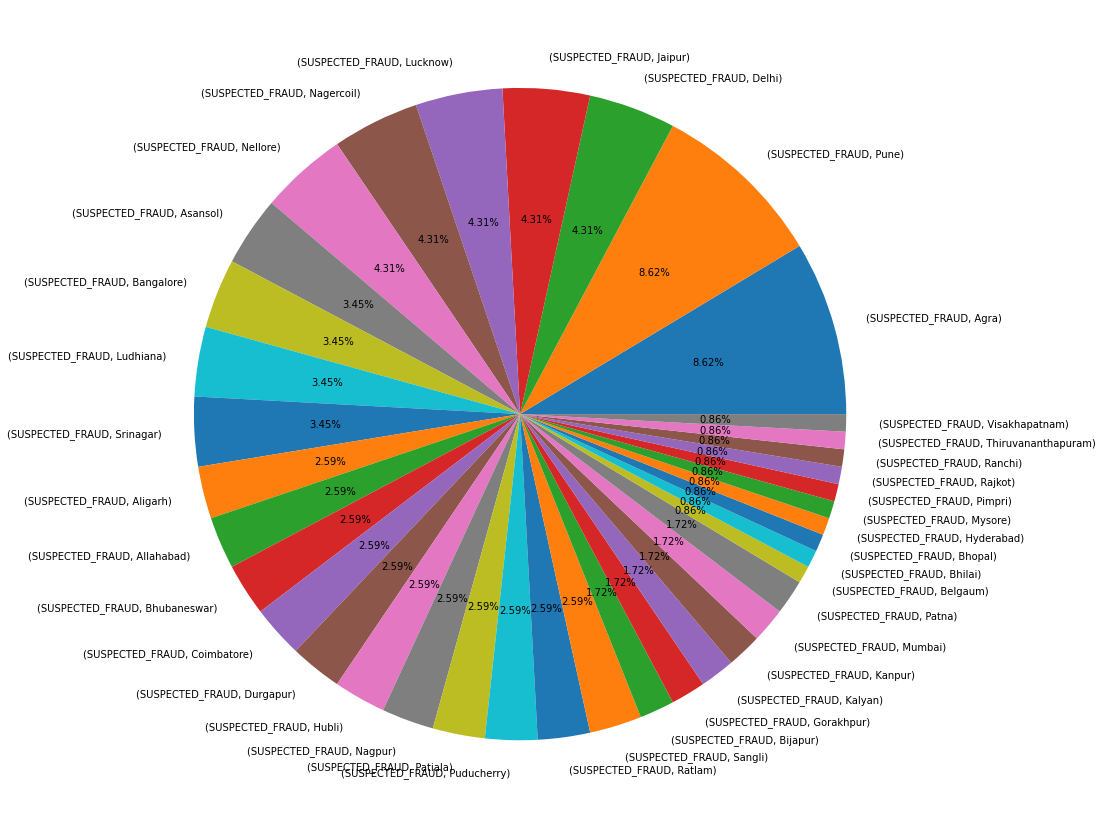

In [29]:
plt.figure(figsize=(15,15))
pending_cities.groupby(by='Order Status')['Order City'].value_counts().plot(kind='pie',autopct="%0.2f%%")
plt.ylabel("")
plt.show()

In [30]:
df.head(2)

,Type Of Payments,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,Smart watch,327.75,0,1/18/2018 12:27,Standard Class


In [31]:
#trying to find number of smart watches sold in india

In [32]:
india = df[df['Order Country']=='India']

In [33]:
india.head(2)

,Type Of Payments,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.8,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,19491,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.8,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,Smart watch,327.75,0,1/17/2018 12:06,Standard Class


In [34]:
india_sw = india[india['Product Name']=='Smart watch ']
india_sw.head(2)

,Type Of Payments,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.8,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,19491,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.8,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,Smart watch,327.75,0,1/17/2018 12:06,Standard Class


In [35]:
india_sw['Order City'].nunique()

25

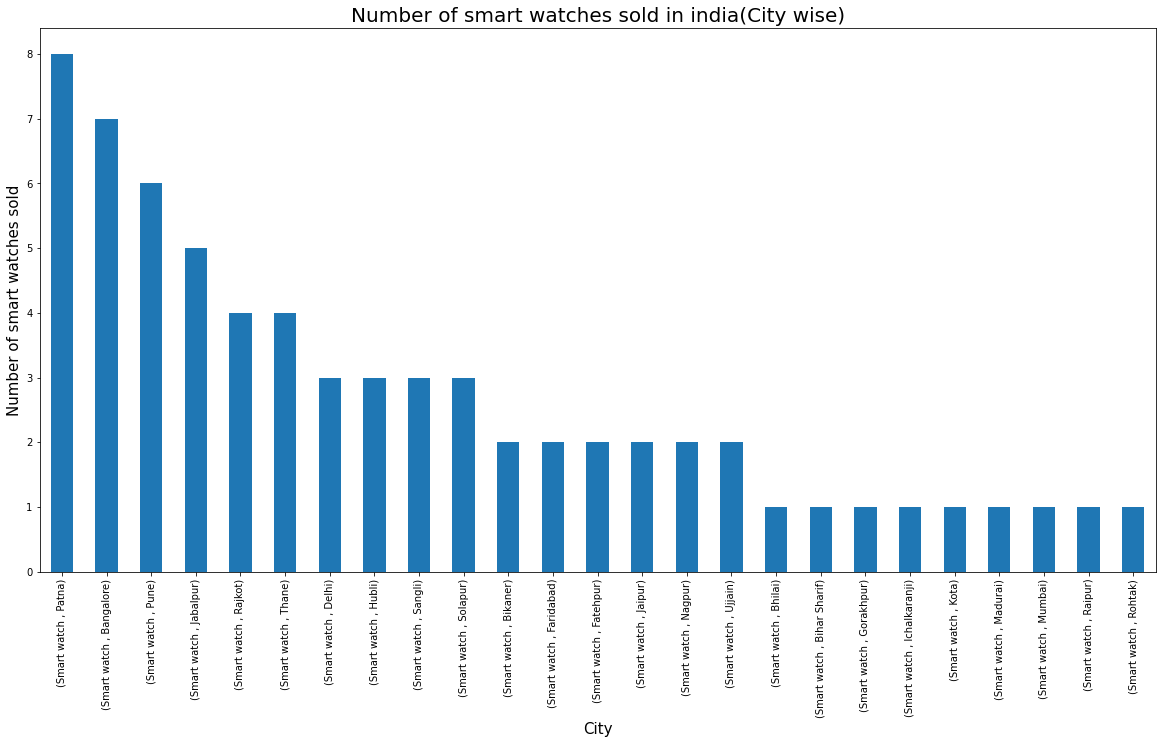

In [36]:
plt.figure(figsize=(20,10))
india_sw.groupby(by='Product Name')['Order City'].value_counts().plot(kind='bar')

plt.title('Number of smart watches sold in india(City wise)',fontsize=20)
plt.xlabel('City',fontsize=15)
plt.ylabel("Number of smart watches sold",fontsize=15)
plt.show()

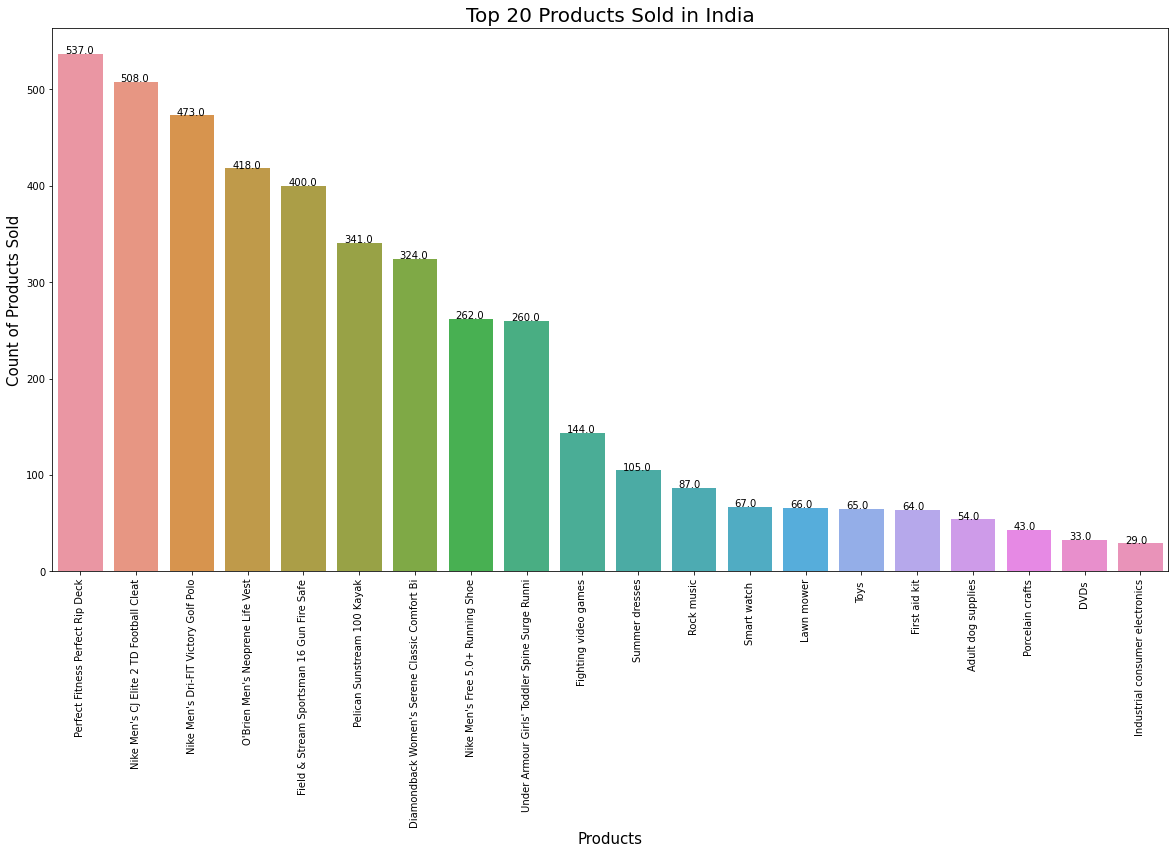

In [37]:
x = india['Product Name'].value_counts()

plt.figure(figsize=(20,10))
ax = sns.barplot(x.index[:20], x.values[:20])
for p in ax.patches:
      ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.125, p.get_height()+0.01))

plt.title("Top 20 Products Sold in India",fontsize=20)
plt.xlabel("Products",fontsize=15)
plt.ylabel("Count of Products Sold",fontsize=15)
plt.xticks(rotation=90)
plt.show()

### Data Cleaning and Model Building

In [38]:
df.head()

,Type Of Payments,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,19491,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,19490,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,19489,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [39]:
df.shape

(180519, 48)

In [40]:
df.isnull().sum()

Type Of Payments                      0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Id                           0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0
Order City                            0
Order Country                         0
Order Customer Id                     0
order date (DateOrders)               0


In [41]:
df1=df.drop(columns=['Order Zipcode','Product Description'],axis=1)
df1.head()

,Type Of Payments,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,1360,73,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,1360,73,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,19491,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,1360,73,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,19490,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,1360,73,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,19489,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,1360,73,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [42]:
df1.shape

(180519, 46)

In [43]:
#To check if the columns have the same values we use this code.
#The combination package from the itertools comapres the each and every columns with all types of combination.
#Creating a code and passing it into def function so we can call it easily when needed.
from itertools import combinations

def check_redundancies(data):
    
    redundancy_list = []
    
    for i in list(combinations(data.columns, 2)):
        
        if all(data[i[0]] == data[i[1]]):
            redundancy_list.append(i)
            print("{}, {} -----> are the same".format(*i))
    
    return redundancy_list
                
redundancies = check_redundancies(df1)

Benefit per order, Order Profit Per Order -----> are the same
Sales per customer, Order Item Total -----> are the same
Category Id, Product Category Id -----> are the same
Customer Id, Order Customer Id -----> are the same
Order Item Cardprod Id, Product Card Id -----> are the same
Order Item Product Price, Product Price -----> are the same


In [44]:
df2 = df1.drop(columns=['Order Profit Per Order','Order Item Total',
                  'Product Category Id','Order Customer Id',
                  'Product Card Id','Product Price'],axis=1)

In [45]:
df2.shape

(180519, 40)

In [46]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type Of Payments               180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Id                    180519 non-null  int64  
 12  Customer Segment              

In [47]:
df3 = df2.select_dtypes(include=np.number)

In [48]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Days for shipping (real)       180519 non-null  int64  
 1   Days for shipment (scheduled)  180519 non-null  int64  
 2   Benefit per order              180519 non-null  float64
 3   Sales per customer             180519 non-null  float64
 4   Late_delivery_risk             180519 non-null  int64  
 5   Category Id                    180519 non-null  int64  
 6   Customer Id                    180519 non-null  int64  
 7   Customer Zipcode               180516 non-null  float64
 8   Department Id                  180519 non-null  int64  
 9   Latitude                       180519 non-null  float64
 10  Longitude                      180519 non-null  float64
 11  Order Id                       180519 non-null  int64  
 12  Order Item Cardprod Id        

In [49]:
df3['Customer Zipcode'].replace(np.nan,725,inplace=True)

In [50]:
df3.isnull().sum()

Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Late_delivery_risk               0
Category Id                      0
Customer Id                      0
Customer Zipcode                 0
Department Id                    0
Latitude                         0
Longitude                        0
Order Id                         0
Order Item Cardprod Id           0
Order Item Discount              0
Order Item Discount Rate         0
Order Item Id                    0
Order Item Product Price         0
Order Item Profit Ratio          0
Order Item Quantity              0
Sales                            0
Product Status                   0
dtype: int64

In [51]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score

In [52]:
#Creating a def function to see the scores of the models

def print_metrics(model,x,y):
    y_pred = model.predict(x)
    print("RMSE:",np.sqrt(mean_absolute_error(y,y_pred)))
    print("MAPE:",mean_absolute_percentage_error(y,y_pred))
    print("R2 SCORE:",r2_score(y,y_pred))
    

In [53]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [54]:
X = df3.drop('Sales',axis=1)
y = df3['Sales']

In [55]:
Xc = sm.add_constant(X)

In [56]:
X_train,X_test,y_train,y_test = train_test_split(Xc,y,random_state=10,test_size=0.3)

In [57]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(126363, 21)
(126363,)
(54156, 21)
(54156,)


In [58]:
#Building the base model
model1 = sm.OLS(y_train,X_train).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.005e+13
Date:                Tue, 25 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:24:43   Log-Likelihood:             6.4077e+05
No. Observations:              126363   AIC:                        -1.282e+06
Df Residuals:                  126343   BIC:                        -1.281e+06
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [59]:
print("TRAINING DATASET")
print_metrics(model1,X_train,y_train)
print(" ")
print("TESTING DATASET")
print_metrics(model1,X_test,y_test)

TRAINING DATASET
RMSE: 0.02411795178096107
MAPE: 3.863018379071632e-06
R2 SCORE: 0.9999999998671382
 
TESTING DATASET
RMSE: 0.02403053531617727
MAPE: 3.844070375612278e-06
R2 SCORE: 0.9999999998726528


#### Spearman r correlation
**Hypothesis:**

            Null Hypothesis (H0): There is no significant correlation between the two variables
            Alternative Hypothesis (Ha): There is a significant correlation between the two variables 

In [60]:
import scipy.stats as stats

In [76]:
# Feature selection using spearman r 
a=[]
c=[]
p=[]
for i in df3.columns:
    if i != 'Sales':
            cor,pval = stats.spearmanr(df3[i],df3['Sales'])
            if pval<0.05:
                a.append(i)
                c.append(cor)
                p.append(pval)

table = pd.DataFrame()
table['Feature Name'] = a
table['Correlation value'] = c
table['P_value'] = p

table

,Feature Name,Correlation value,P_value
0,Benefit per order,0.436303,0.000000e+00
1,Sales per customer,0.986335,0.000000e+00
2,Category Id,0.178403,0.000000e+00
3,Customer Id,0.014405,9.319472e-10
4,Department Id,0.240958,0.000000e+00
5,Order Id,0.043702,4.966761e-77
6,Order Item Cardprod Id,0.176432,0.000000e+00
7,Order Item Discount,0.534150,0.000000e+00
8,Order Item Id,0.043702,4.966955e-77
9,Order Item Product Price,0.666717,0.000000e+00


* Sales per customer can be dropped since it has the highest correlation
* All the ID columns can be dropped as they are unique.

In some cases,

            * H0 can be rejected
            * H0 can be accepcted
Here, we accepct the features with pvalue less the the significant value(0.05).

In [77]:
df3.head()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,Longitude,Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Product Status
0,3,4,91.250000,314.640015,0,73,20755,725.0,2,18.251453,-66.037056,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,0
1,5,4,-249.089996,311.359985,1,73,19492,725.0,2,18.279451,-66.037064,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,0
2,4,4,-247.779999,309.720001,0,73,19491,95125.0,2,37.292233,-121.881279,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,0
3,3,4,22.860001,304.809998,0,73,19490,90027.0,2,34.125946,-118.291016,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,0
4,2,4,134.210007,298.250000,0,73,19489,725.0,2,18.253769,-66.037048,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,0


In [63]:
df4 = df3[['Benefit per order','Category Id','Department Id','Order Item Discount','Order Item Product Price','Order Item Quantity']]

In [64]:
df4

,Benefit per order,Category Id,Department Id,Order Item Discount,Order Item Product Price,Order Item Quantity
0,91.250000,73,2,13.110000,327.750000,1
1,-249.089996,73,2,16.389999,327.750000,1
2,-247.779999,73,2,18.030001,327.750000,1
3,22.860001,73,2,22.940001,327.750000,1
4,134.210007,73,2,29.500000,327.750000,1
...,...,...,...,...,...,...
180514,40.000000,45,7,0.000000,399.980011,1
180515,-613.770019,45,7,4.000000,399.980011,1
180516,141.110001,45,7,8.000000,399.980011,1
180517,186.229996,45,7,12.000000,399.980011,1


In [65]:
#Building a second model
X = df4
Xc = sm.add_constant(X)

In [66]:
X_train,X_test,y_train,y_test = train_test_split(Xc,y,random_state=10,test_size=0.3)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(126363, 7)
(126363,)
(54156, 7)
(54156,)


In [67]:
model2 = sm.OLS(y_train,X_train).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                 3.152e+05
Date:                Tue, 25 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:24:45   Log-Likelihood:            -6.2104e+05
No. Observations:              126363   AIC:                         1.242e+06
Df Residuals:                  126356   BIC:                         1.242e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [68]:
print("TRAINING DATASET")
print_metrics(model2,X_train,y_train)
print(" ")
print("TESTING DATASET")
print_metrics(model2,X_test,y_test)

TRAINING DATASET
RMSE: 4.367384261298311
MAPE: 0.14787383185555586
R2 SCORE: 0.9373696066950551
 
TESTING DATASET
RMSE: 4.373009703022933
MAPE: 0.14903460506376534
R2 SCORE: 0.9385689115355644


**The model is still overfitting so we go for Regularisation methods**

In [69]:
from sklearn.linear_model import Ridge,Lasso

In [70]:
rg = Ridge()
model3 = rg.fit(X_train,y_train)

In [71]:
print("TRAINING DATASET")
print_metrics(model3,X_train,y_train)
print(" ")
print("TESTING DATASET")
print_metrics(model3,X_test,y_test)

TRAINING DATASET
RMSE: 4.367388299341156
MAPE: 0.14787354602636246
R2 SCORE: 0.937369606687251
 
TESTING DATASET
RMSE: 4.3730140342437664
MAPE: 0.14903431349074472
R2 SCORE: 0.9385689057083012


In [72]:
ls = Lasso()
model4 = ls.fit(X_train,y_train)

print("TRAINING DATASET")
print_metrics(model4,X_train,y_train)
print(" ")
print("TESTING DATASET")
print_metrics(model4,X_test,y_test)

TRAINING DATASET
RMSE: 4.372605121107685
MAPE: 0.1468686505534611
R2 SCORE: 0.9372349608200161
 
TESTING DATASET
RMSE: 4.378565994239155
MAPE: 0.14801173133847817
R2 SCORE: 0.9384328200244658


In [73]:
model = ['Model1_OLS_BASE','Model2_OLS','Model3_Ridge','Model4_Lasso']
r2 = [0.999,0.937,0.937,0.937]
rmse = [0.024,4.37,4.36,4.37]
mape=[3.868,0.147,0.147,0.146]

In [74]:
scores = pd.DataFrame(data=[model,r2,rmse,mape],index=['MODEL','R2 SCORE','RMSE SCORE','MAPE SCORE'])

In [75]:
scores.T

,MODEL,R2 SCORE,RMSE SCORE,MAPE SCORE
0,Model1_OLS_BASE,0.999,0.024,3.868
1,Model2_OLS,0.937,4.37,0.147
2,Model3_Ridge,0.937,4.36,0.147
3,Model4_Lasso,0.937,4.37,0.146


#### The ridge model can be selected as it has the lowest RMSE score.